### 1. importing the data

In [1]:
import pandas as pd

marketing = pd.read_csv("marketing.csv", parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel is_retained  
0           NaT           House Ads        True  
1           NaT       

### 2. examining the data 
* to ensure the validity of the dataset
* to have a more holistic understanding what the dataset contains

In [2]:
#print the summary statistics
print(marketing.describe().T)

                     count unique                  top  freq      first  \
user_id              10037   7309           a100000882    12        NaT   
date_served          10021     31  2018-01-15 00:00:00   789 2018-01-01   
marketing_channel    10022      5            House Ads  4733        NaT   
variant              10037      2              control  5091        NaT   
converted            10022      2                False  8946        NaT   
language_displayed   10037      4              English  9793        NaT   
language_preferred   10037      4              English  9275        NaT   
age_group            10037      7          19-24 years  1682        NaT   
date_subscribed       1856     31  2018-01-16 00:00:00   163 2018-01-01   
date_canceled          577    115  2018-04-02 00:00:00    15 2018-01-05   
subscribing_channel   1856      5            Instagram   600        NaT   
is_retained           1856      2                 True  1279        NaT   

                        

In [3]:
#print the number of non-missing values and the data types of all columns
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
user_id                10037 non-null object
date_served            10021 non-null datetime64[ns]
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null datetime64[ns]
date_canceled          577 non-null datetime64[ns]
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB
None


In [4]:
#check dtype of is_retained, converted column
print(marketing['is_retained'].dtype)
print(marketing['is_retained'].unique())

print(marketing['converted'].dtype)
print(marketing['converted'].unique())

object
[True False nan]


In [15]:
#change dtype appropriately
marketing['is_retained'] = marketing['is_retained'].astype('bool')
marketing['converted'] = marketing['converted'].astype('bool')
print(marketing['is_retained'].dtype)
print(marketing['converted'].dtype)

bool
bool


### Feature engineering
> Adding new columns that derive information from existing data or based on domain knowledge
* Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.

In [6]:
#add 'channel_code' column
print(marketing['marketing_channel'].dtype)
print(marketing['marketing_channel'].unique())

object
['House Ads' 'Push' 'Facebook' 'Instagram' 'Email' nan]


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: channel_code, dtype: float64
[ 1.  5.  3.  2.  4. nan]


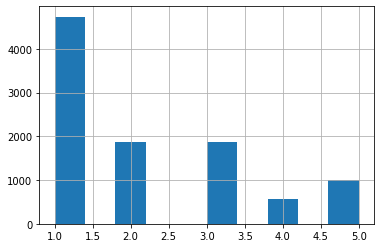

In [13]:
channel_dict = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Email':4, 'Push':5}
marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)
print(marketing['channel_code'].head())
print(marketing['channel_code'].unique())
marketing['channel_code'].hist()

In [8]:
#add 'is_correct_lang' column to check if language_displayed and language_preferred are well matched
import numpy as np
marketing['is_correct_lang'] = np.where(marketing['language_displayed']==marketing['language_preferred'], 'Yes', 'No')
print(marketing['is_correct_lang'].head())
print(marketing['is_correct_lang'].unique())
print(marketing['is_correct_lang'].dtype)

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: is_correct_lang, dtype: object
['Yes' 'No']
object


In [9]:
#add DoW column to know the day of week on which a user subscribed
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek
print(marketing['DoW'].head())
print(marketing['DoW'].unique())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DoW, dtype: float64
[ 0.  1.  2.  3.  4.  5.  6. nan]


### check daily marketing reach by channel

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#daily marketing reach by channel
daily_users = marketing.groupby('date_served')['user_id'].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


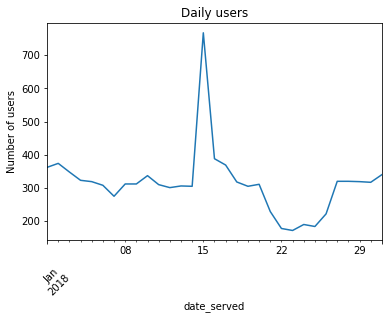

In [11]:
#visualize
daily_users.plot()

plt.title('Daily users')
plt.ylabel('Number of users')
plt.xticks(rotation=45)

plt.show()

### analyzing common metrics - conversion rate & retention rate

In [24]:
#conversion rate
total = marketing['user_id'].nunique()
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()
conversion_rate = subscribers / total
print("conversion_rate: ", round(conversion_rate*100, 2), "%")

conversion_rate:  14.09 %


In [31]:
#retention rate
retained = marketing[(marketing['is_retained']==True) & (marketing['converted']==True)]['user_id'].nunique()
retention_rate = retained / subscribers
print("retention_rate: ", round(retention_rate*100, 2), "%")

696
retention_rate:  67.57 %


### <mark>! check this part later !</mark>

In [39]:
#if 'converted' is False, 'is_retained' should be False as well
m = marketing[(marketing['is_retained']==True) & (marketing['converted']!=True)]
print(m[['user_id','converted','is_retained']].head())

#check later
#marketing['is_retained'] = np.where(marketing['converted']==False, False)

       user_id  converted  is_retained
22  a100000050      False         True
24  a100000051      False         True
26  a100000052      False         True
28  a100000053      False         True
30  a100000054      False         True


### customer segmentation
* could be age, gender, location, past interactions with business, marketing channels, etc.
* we'll explore segmentation by <u>marketing channel</u>

In [47]:
def conv_rate(column_name, language):
    temp_df = marketing[marketing[column_name]==language]
    total = temp_df['user_id'].nunique()
    converted = temp_df[temp_df['converted']==True]['user_id'].nunique()
    conversion_rate = converted/total
    print(language,'conversion rate:', round(conversion_rate*100, 2), '%')
    
print(marketing['language_displayed'].unique())
conv_rate('language_displayed', 'English')
conv_rate('language_displayed', 'German')
conv_rate('language_displayed', 'Arabic')
conv_rate('language_displayed', 'Spanish')

['English' 'German' 'Arabic' 'Spanish']
English conversion rate: 13.13 %
German conversion rate: 71.62 %
Arabic conversion rate: 50.0 %
Spanish conversion rate: 20.0 %
